## Mateusz Lęcznar 406370 gr środa 18.15
# Regresja Liniowa


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns 
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [2]:
data.head(8)

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000


In [3]:
data.describe

<bound method NDFrame.describe of     Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]>

In [4]:
x = data.values[:, 0]
y = data.values[:, 1]

<AxesSubplot: xlabel='Population', ylabel='Profit'>

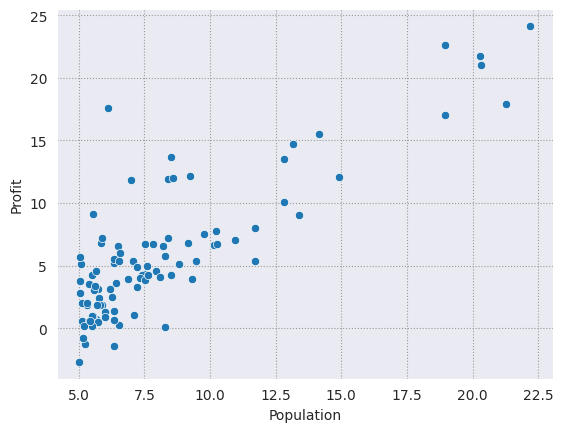

In [5]:
Sale_Data= pd.DataFrame(data)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.scatterplot(data=Sale_Data, x="Population", y="Profit")

In [6]:
X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)


In [7]:
y.shape = [1, y.shape[0]]


In [8]:
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [9]:
def computeCost(X, y, theta):
    A=np.power(np.dot(theta.T,X)-y,2)
    return np.sum(A)/(y.shape[1]*2)


computeCost(X,y,theta)

32.072733877455676

In [10]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    m=len(y[0])
    cost=[]
    
    for i in range(it):
        h=np.dot(theta.T,X)-y
        theta=theta-alpha*(h@X.T).T/m
        cost.append(computeCost(X,y,theta))
       
    return theta, cost

alpha=0.01
it=1000
theta,cost=simple_gradient(X,y,theta,alpha,it)
print(theta)

[[-3.24140214]
 [ 1.1272942 ]]


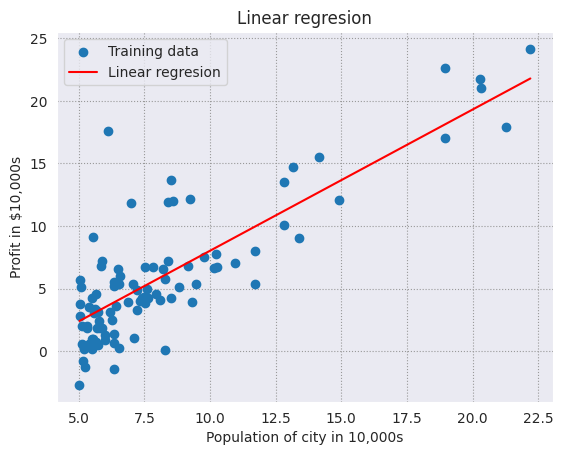

Text(0, 0.5, 'Iteration number')

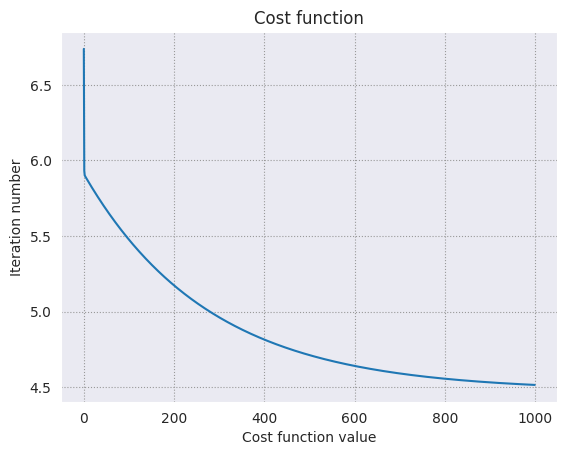

In [11]:
Y_pred = theta[0]+theta[1]*x
plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(Y_pred),max(Y_pred)],color='red')
plt.title("Linear regresion")
plt.legend(['Training data','Linear regresion'])
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()
plt.plot(cost)
plt.title('Cost function')
plt.xlabel("Cost function value")
plt.ylabel("Iteration number")

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


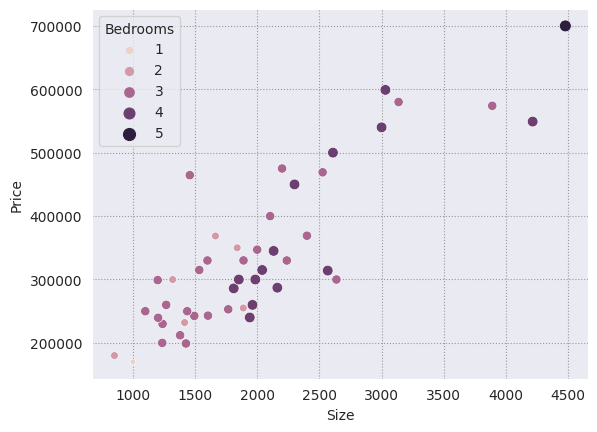

In [12]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
sns.scatterplot(data= data2,x="Size",y="Price",size="Bedrooms",hue="Bedrooms")
data2.head(5)

In [13]:
data2['Size']=(data2['Size']-data2['Size'].mean())/data2['Size'].std()
data2['Bedrooms']=(data2['Bedrooms']-data2['Bedrooms'].mean())/data2['Bedrooms'].std()
data2['Price']=(data2['Price']-data2['Price'].mean())/data2['Price'].std()

In [14]:
data2.head(5)

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [15]:
x = data2.values[:,0:2]
y = data2.values[:, 2]
X = np.concatenate([np.ones((1,x.shape[0]), dtype=np.float32), np.transpose(x)], axis=0)
print(X)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)
computeCost(X,y,theta)

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00]
 [ 1.30009869e-01 -5.04189838e-01  5.02476364e-01 -7.35723065e-01
   1.25747602e+00 -1.97317285e-02 -5.87239800e-01 -7.21881404e-01
  -7.81023044e-01 -6.37573110e-01 -7.63567023e-02 -8.56737193e-04
  -1.39273340e-01  3.1172

0.4893617021276595

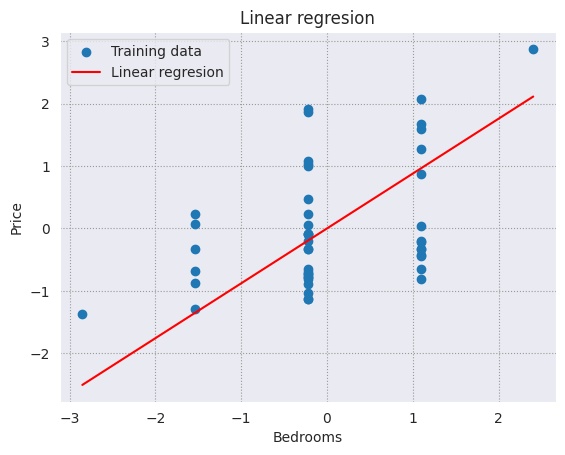

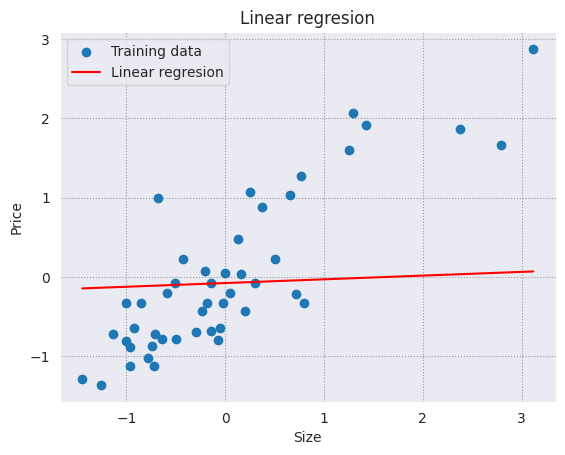

[[-1.10301839e-16]
 [ 8.78503652e-01]
 [-4.69166570e-02]]


Text(0, 0.5, 'Iteration number')

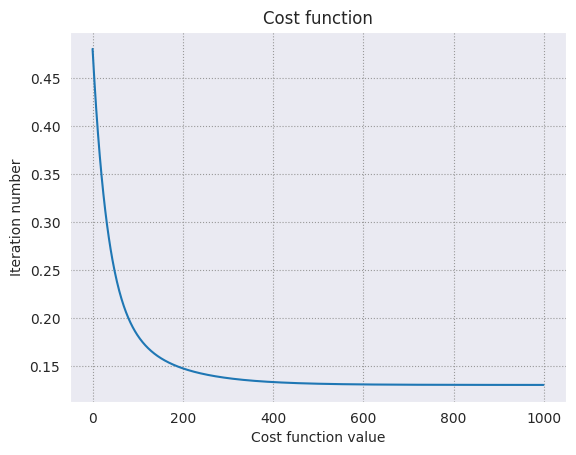

In [16]:
theta,cost=simple_gradient(X,y,theta,alpha,it)
x = data2.values[:,1]
Y_pred = theta[0]+theta[1]*x

plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(Y_pred),max(Y_pred)],color='red')
plt.title("Linear regresion")
plt.legend(['Training data','Linear regresion'])
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

x = data2.values[:,0]
Y_pred = theta[0]+theta[2]*x

plt.scatter(x,y)
plt.plot([min(x),max(x)],[min(Y_pred),max(Y_pred)],color='red')
plt.title("Linear regresion")
plt.legend(['Training data','Linear regresion'])
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()
print(theta)

plt.plot(cost)
plt.title('Cost function')
plt.xlabel("Cost function value")
plt.ylabel("Iteration number")


In [17]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price']) 
 
# Normalization
data2['Size']=(data2['Size']-data2['Size'].mean())/data2['Size'].std()
data2['Bedrooms']=(data2['Bedrooms']-data2['Bedrooms'].mean())/data2['Bedrooms'].std()
data2['Price']=(data2['Price']-data2['Price'].mean())/data2['Price'].std()


x = data2.values[:,0:2]
y = data2.values[:, 2]
X = np.concatenate([np.ones((1,x.shape[0]), dtype=np.float32), np.transpose(x)], axis=0)
# Split into train and test sets (70-30%)

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)
 
# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))


Coefficients: 
 [ 0.89168767 -0.0454127 ]
Residual sum of squares: 0.39857004910123056
